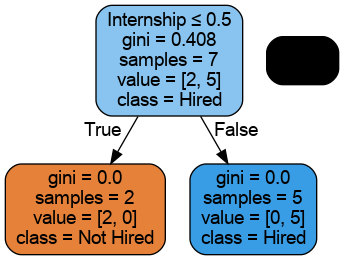

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pydotplus
from IPython.display import Image

# Create a custom student dataset
data = {
    "GPA": [3.5, 3.0, 3.8, 3.2, 3.6, 2.8, 3.9, 2.5, 3.1, 3.7],
    "Internship": [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],  # 1 = Yes, 0 = No
    "Experience": [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],  # 1 = Yes, 0 = No
    "Hired": [1, 0, 1, 0, 1, 0, 1, 0, 1, 1]  # 1 = Hired, 0 = Not Hired
}

# Convert to a DataFrame
students = pd.DataFrame(data)

# Features and target variable
X = students[["GPA", "Internship", "Experience"]]
y = students["Hired"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree to DOT format
dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=["GPA", "Internship", "Experience"],
    class_names=["Not Hired", "Hired"],
    filled=True,
    rounded=True,
    special_characters=True
)

# Use pydotplus to create a graph from the DOT data
graph = pydotplus.graph_from_dot_data(dot_data)

# Display the graph in a Jupyter Notebook
Image(graph.create_png())

# Save the graph to a file (optional)
# graph.write_png("student_decision_tree.png")